In [571]:
from seaborn import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [572]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/AI in Business/Assignment 1 - Titanic/train.csv')
df_test = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/AI in Business/Assignment 1 - Titanic/test.csv')


In [573]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [574]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [576]:
df = df.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)


In [577]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

In [578]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [579]:
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 5].index
df['Title'] = df['Title'].replace(rare_titles, 'Misc')


In [580]:
df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       14
Dr          7
Rev         6
Name: Title, dtype: int64

In [581]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


<Axes: xlabel='Age', ylabel='Count'>

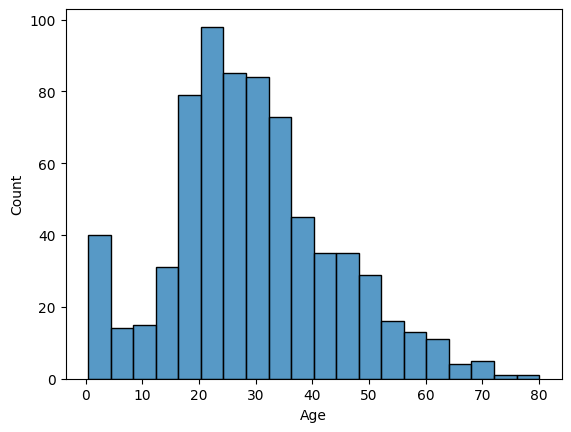

In [582]:
sns.histplot(data=df, x='Age')

In [583]:
df['Age'].mean()

29.69911764705882

In [584]:
df.groupby('Sex')['Age'].mean()


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [585]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [586]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [587]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [588]:
label_encoder = LabelEncoder()

df['Embarked_Code'] = label_encoder.fit_transform(df['Embarked'])
df['Sex_Code'] = label_encoder.fit_transform(df['Sex'])
df['Title_Code'] = label_encoder.fit_transform(df['Title'])


In [589]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Code,Sex_Code,Title_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,1,4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,2,0,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,5
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2,1,4


In [590]:
df.dtypes

Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked          object
Title             object
Embarked_Code      int64
Sex_Code           int64
Title_Code         int64
dtype: object

In [591]:
df['Child'] = ((df['Age'] < 16)).astype(int)
df['Elder'] = ((df['Age'] > 60)).astype(int)


In [592]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Code,Sex_Code,Title_Code,Child,Elder
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,1,4,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,5,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,2,0,3,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,5,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2,1,4,0,0


In [593]:
df_death = df.groupby('Survived').agg({'Survived': 'sum',
                                       'Age': 'mean',
                                       'Fare': 'mean',
                                       'SibSp': 'mean',
                                       'Parch': 'mean',
                                       'Child': 'sum',
                                        'Elder': 'sum',
                                       'Embarked': lambda x: x.mode()[0],
                                       'Pclass': lambda x: x.mode()[0]})


In [594]:
df_death.head()

,Survived,Age,Fare,SibSp,Parch,Child,Elder,Embarked,Pclass
Survived,,,,,,,,,
0,0,30.193989,22.117887,0.553734,0.329690,34,17,S,3
1,342,28.232953,48.395408,0.473684,0.464912,49,5,S,1


In [595]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Code,Sex_Code,Title_Code,Child,Elder
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,1,4,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,5,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,2,0,3,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,5,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2,1,4,0,0


In [596]:
df_men = df[df['Sex']== 'male']
df_women = df[df['Sex']== 'female']
df_child = df[df['Child']== 1]
df_Elder = df[df['Elder']== 1]

In [597]:
df_men_survived_0 = df_men[df_men['Survived'] == 0]
men_death_rate = (len(df_men_survived_0) / len(df_men)) * 100
print("Male Death Rate:", men_death_rate)

df_women_survived_0 = df_women[df_women['Survived'] == 0]
women_death_rate = (len(df_women_survived_0) / len(df_women)) * 100
print("Female Death Rate:", women_death_rate)

df_child_survived_0 = df_child[df_child['Survived'] == 0]
child_death_rate = (len(df_child_survived_0) / len(df_child)) * 100
print("Child Death Rate:", child_death_rate)

df_Elder_survived_0 = df_Elder[df_Elder['Survived'] == 0]
Elder_death_rate = (len(df_Elder_survived_0) / len(df_Elder)) * 100
print("Elder Death Rate:", Elder_death_rate)


Male Death Rate: 81.10918544194108
Female Death Rate: 25.796178343949045
Child Death Rate: 40.963855421686745
Elder Death Rate: 77.27272727272727


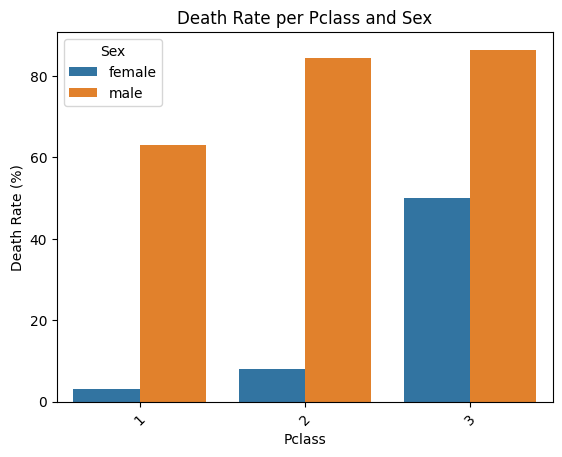

In [598]:
death_rate_per_pclass = df.groupby(['Pclass', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)

sns.barplot(x=death_rate_per_pclass.index.get_level_values(0), y=death_rate_per_pclass.values, hue=death_rate_per_pclass.index.get_level_values(1))
plt.xlabel('Pclass')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Pclass and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


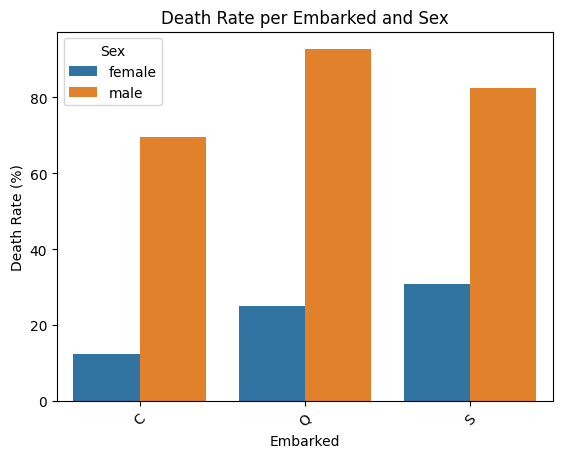

In [599]:
death_rate_per_embarked = df.groupby(['Embarked', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
sns.barplot(x=death_rate_per_embarked.index.get_level_values(0), y=death_rate_per_embarked.values, hue=death_rate_per_embarked.index.get_level_values(1))
plt.xlabel('Embarked')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Embarked and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()





In [600]:
death_rate_per_SibSp = df.groupby('SibSp')['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
print(death_rate_per_SibSp)

SibSp
0     65.460526
1     46.411483
2     53.571429
3     75.000000
4     83.333333
5    100.000000
8    100.000000
Name: Survived, dtype: float64


In [601]:
death_rate_per_Parch = df.groupby(['Parch', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
print(death_rate_per_Parch)

Parch  Sex   
0      female     21.134021
       male       83.471074
1      female     23.333333
       male       67.241379
2      female     38.775510
       male       67.741935
3      female     25.000000
       male      100.000000
4      female    100.000000
       male      100.000000
5      female     75.000000
       male      100.000000
6      female    100.000000
Name: Survived, dtype: float64


In [602]:
df['Fam_Size'] = df['SibSp'] + df['Parch'] + 1

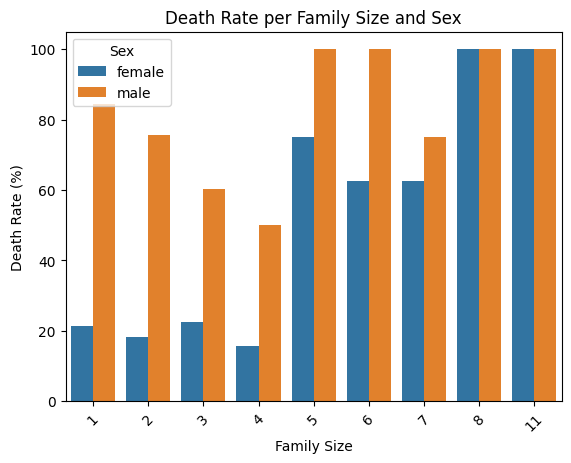

In [603]:
death_rate_per_Fam_Size = df.groupby(['Fam_Size', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
sns.barplot(x=death_rate_per_Fam_Size.index.get_level_values(0), y=death_rate_per_Fam_Size.values, hue=death_rate_per_Fam_Size.index.get_level_values(1))
plt.xlabel('Family Size')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Family Size and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')


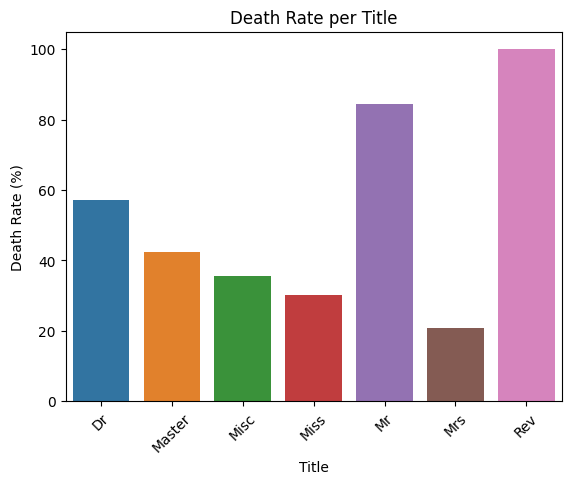

In [628]:
death_rate_per_title = df.groupby('Title')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
sns.barplot(x=death_rate_per_title.index, y=death_rate_per_title.values)
plt.xlabel('Title')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Title')
plt.xticks(rotation=45)
plt.show()


In [604]:
df['Alone'] = ((df['Fam_Size'] == 1)).astype(int)
df['Big_Family'] = ((df['Fam_Size'] > 4)).astype(int)

In [605]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Code,Sex_Code,Title_Code,Child,Elder,Fam_Size,Alone,Big_Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,1,4,0,0,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,5,0,0,2,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,2,0,3,0,0,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,5,0,0,2,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2,1,4,0,0,1,1,0


In [606]:
def calculate_family_size_risk(row):
    if row['Sex'] == 2:
        if row['Fam_Size'] < 5:
            return 1
        elif 5 <= row['Fam_Size'] <= 7:
            return 2
        else:
            return 3
    elif row['Sex'] == 1:
        if row['Fam_Size'] == 1 or row['Fam_Size'] >= 5:
            return 3
        else:
            return 2

df['Family_Size_Risk'] = df.apply(calculate_family_size_risk, axis=1)


In [629]:
death_rate_per_family_size_risk = df.groupby('Family_Size_Risk')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
print(death_rate_per_family_size_risk)


Series([], Name: Survived, dtype: int64)


/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_24742/1582525022.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  death_rate_per_family_size_risk = df.groupby('Family_Size_Risk')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)


In [608]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Code,Sex_Code,Title_Code,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,1,4,0,0,2,0,0,None
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,5,0,0,2,0,0,None
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,2,0,3,0,0,1,1,0,None
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,5,0,0,2,0,0,None
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2,1,4,0,0,1,1,0,None


In [609]:
bin_ranges = [0, 5, 10, 15, 30, 40, 50, 60, 70, 80]  # Adjust the bin ranges as desired
labels = range(1, len(bin_ranges))  # Assign labels 1, 2, 3, 4, 5, and so on
df['Age_Bin'] = pd.cut(df['Age'], bins=bin_ranges, labels=labels)


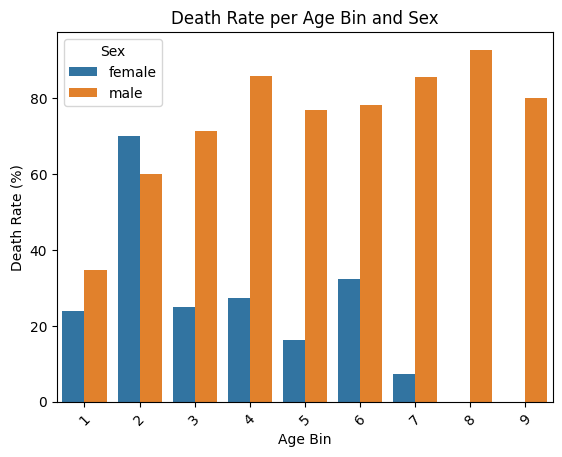

In [610]:
death_rate_per_age_bin_sex = df.groupby(['Age_Bin', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
sns.barplot(x=death_rate_per_age_bin_sex.index.get_level_values(0), y=death_rate_per_age_bin_sex.values, hue=death_rate_per_age_bin_sex.index.get_level_values(1))
plt.xlabel('Age Bin')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Age Bin and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


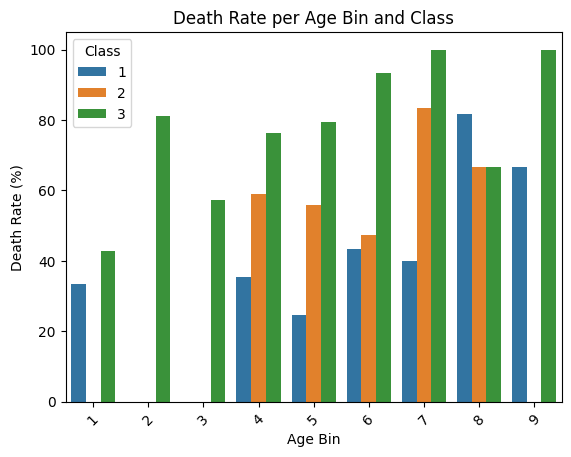

In [611]:
death_rate_per_age_bin_class = df.groupby(['Age_Bin', 'Pclass'])['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
sns.barplot(x=death_rate_per_age_bin_class.index.get_level_values(0), y=death_rate_per_age_bin_class.values, hue=death_rate_per_age_bin_class.index.get_level_values(1))
plt.xlabel('Age Bin')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Age Bin and Class')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

In [612]:
def calculate_age_class_risk(row):
    if row['Pclass'] == 1:
        if row['Age'] < 15:
            return 1
        elif 15 <= row['Age'] <= 60:
            return 2
        elif 60 < row['Age'] <= 70:
            return 3
        elif row['Age'] > 70:
            return 2
    elif row['Pclass'] == 2:
        if row['Age'] < 15:
            return 1
        elif 15 <= row['Age'] <= 50:
            return 2
        elif row['Age'] > 50:
            return 3
    elif row['Pclass'] == 3:
        if 5 <= row['Age'] <= 10 or row['Age'] > 15:
            return 3
        else:
            return 2
    else:
        return None


df['Class_Age_Risk'] = df.apply(calculate_age_class_risk, axis=1)


In [613]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,...,Sex_Code,Title_Code,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk,Age_Bin,Class_Age_Risk
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,...,1,4,0,0,2,0,0,None,4,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,...,0,5,0,0,2,0,0,None,5,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,...,0,3,0,0,1,1,0,None,4,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,...,0,5,0,0,2,0,0,None,5,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,...,1,4,0,0,1,1,0,None,5,3


In [614]:
def calculate_sex_age_risk(row):
    if row['Sex'] == 2 and row['Age'] > 50:
        return 1
    elif row['Sex'] == 2 and (5 <= row['Age'] <= 10 or 40 <= row['Age'] <= 50):
        return 3
    elif row['Sex'] == 1 and row['Age'] < 10:
        return 1
    elif row['Sex'] == 1 and (15 <= row['Age'] <= 30 or row['Age'] > 50):
        return 3
    else:
        return 2


df['Sex_Age_Risk'] = df.apply(calculate_sex_age_risk, axis=1)


In [615]:
df['Risk_Level'] = df['Class_Age_Risk'] + df['Sex_Age_Risk'] + df['Family_Size_Risk'] - 1

In [616]:
death_rate_per_risk_level = df.groupby('Risk_Level')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
print(death_rate_per_risk_level)


Series([], Name: Survived, dtype: int64)


/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_24742/3121940108.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  death_rate_per_risk_level = df.groupby('Risk_Level')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)


In [617]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,...,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk,Age_Bin,Class_Age_Risk,Sex_Age_Risk,Risk_Level
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891,...,891.000000,891.000000,891.000000,891.000000,891.000000,0,891.0,891.000000,891.0,0
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,7,...,NaN,NaN,NaN,NaN,NaN,0,9.0,NaN,NaN,0
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,NaN,S,Mr,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,517,...,NaN,NaN,NaN,NaN,NaN,NaN,503.0,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.441268,0.523008,0.381594,32.204208,NaN,NaN,...,0.093154,0.024691,1.904602,0.602694,0.069585,NaN,NaN,2.509540,2.0,NaN
std,0.486592,0.836071,NaN,NaN,13.018747,1.102743,0.806057,49.693429,NaN,NaN,...,0.290811,0.155270,1.613459,0.489615,0.254589,NaN,NaN,0.551473,0.0,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,1.000000,2.0,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,...,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2.000000,2.0,NaN
50%,0.000000,3.000000,NaN,NaN,29.000000,0.000000,0.000000,14.454200,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN,3.000000,2.0,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,...,0.000000,0.000000,2.000000,1.000000,0.000000,NaN,NaN,3.000000,2.0,NaN


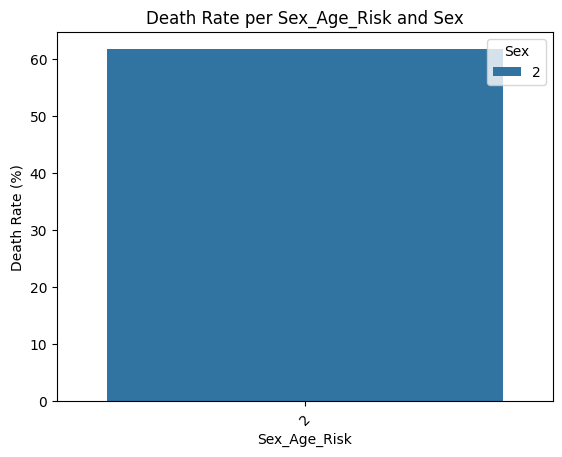

In [618]:
death_rate_per_sex_age_risk = df.groupby('Sex_Age_Risk')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
sns.barplot(x=death_rate_per_sex_age_risk.index, y=death_rate_per_sex_age_risk.values, hue=death_rate_per_sex_age_risk.index)
plt.xlabel('Sex_Age_Risk')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Sex_Age_Risk and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

In [619]:
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,...,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk,Age_Bin,Class_Age_Risk,Sex_Age_Risk,Risk_Level
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,...,0,0,2,0,0,None,4,3,2,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,...,0,0,2,0,0,None,5,2,2,NaN
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,...,0,0,1,1,0,None,4,3,2,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,...,0,0,2,0,0,None,5,2,2,NaN
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,...,0,0,1,1,0,None,5,3,2,NaN


Main takeaways so far: Being a 3rd class adult male with a large family size, or traveling alone, has a dramatically higher chance of death.

In [620]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Embarked_Code', 'Sex_Code', 'Title_Code', 'Child',
       'Elder', 'Fam_Size', 'Alone', 'Big_Family', 'Family_Size_Risk',
       'Age_Bin', 'Class_Age_Risk', 'Sex_Age_Risk', 'Risk_Level'],
      dtype='object')

In [621]:
cat_columns = ['Pclass', 'Sex', 'Embarked', 'Child', 'Elder',  'Age_Bin', 'Risk_Level', 'Alone', 'Big_Family']
num_columns = ['Fare', 'Fam_Size']
target = 'Survived'

In [622]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [623]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_columns),
                                               ('num', num_transformer, num_columns)])


In [624]:
# Create a logistic regression model with preprocessor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))


0.7877094972067039


In [625]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model with preprocessor
decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', DecisionTreeClassifier())])

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = decision_tree_model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_tree))


0.8156424581005587


In [626]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', RandomForestClassifier())])

rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)
print(metrics.accuracy_score(y_test, rf_predict))


0.8379888268156425


In [627]:
rf_classifier = rf_model.named_steps['classifier']
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Combine feature names and their importance scores
feature_importances = zip(feature_names, importances)
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")



Feature: Elder, Importance: 0.15961536813573748
Feature: Child, Importance: 0.15370467485638586
Feature: Embarked, Importance: 0.04990983303353277
Feature: Pclass, Importance: 0.03128879413601311
Feature: Big_Family, Importance: 0.020592776504374233
Feature: Sex, Importance: 0.017794896779824765
Feature: Alone, Importance: 0.017670597336955265
Feature: Fare, Importance: 0.014737942233932409
Feature: Age_Bin, Importance: 0.013626692974646918
Feature: Risk_Level, Importance: 0.007987643331954132
Feature: Fam_Size, Importance: 0.003434384949741212
